# What's the influence of time on BTC-EUR market

## Definitions

In [1]:
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt


FILE_PATH = '../data/csv_files/btc_eur_3600.csv'

In [2]:
def get_data():
    df = pd.read_csv(FILE_PATH)
    df['time'] = df.timestamp.apply(Timestamp.utcfromtimestamp)
    df = df.drop(columns=['date','timestamp', 'length', 'bdb_low', 'bdb_high', 'mme12', 'mme26', 'stochastic'])
    return df.set_index('time')

In [3]:
def local_extrema_label(window_array):
    if window_array[0] == max(window_array):
        return -1
    elif window_array[0] == min(window_array):
        return 1
    else:
        return 0

In [4]:
def add_columns(df):
    df['price_delta'] = df['closing_price'].shift(-1) - df['closing_price']
    df['price_delta_percent'] = df['price_delta'] / df['closing_price'] * 100
    
    window_length = 24
    df['labels'] = df['closing_price'].rolling(window=window_length,center=False
                                ).apply(func=local_extrema_label
                                ).shift(-window_length+1)
    df['day'] = df.index.weekday
    df['hour'] = df.index.hour
    return df

In [30]:
df = add_columns(get_data())
df = df[['labels', 'price_delta_percent', 'day', 'hour', 'volume']]
df = df.dropna()
df['labels'].value_counts()

 0.0    4284
 1.0     856
-1.0     607
Name: labels, dtype: int64

## Grouping by hour

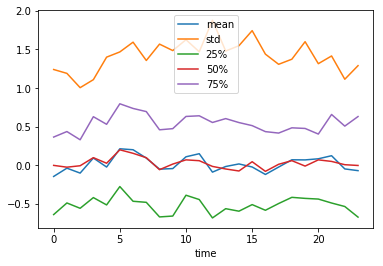

In [12]:
df.groupby(df.index.hour).describe()['price_delta_percent'].drop(columns=['count', 'min', 'max']).plot()

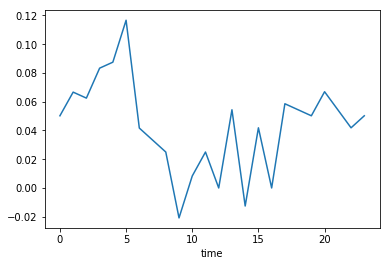

In [13]:
df.groupby(df.index.hour).mean()['labels'].plot()

## Grouping by weekday

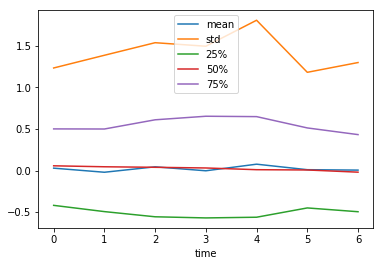

In [14]:
df.groupby(df.index.weekday).describe()['price_delta_percent'].drop(columns=['count', 'min', 'max']).plot()

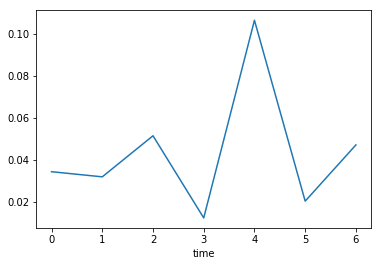

In [15]:
df.groupby(df.index.weekday).mean()['labels'].plot()

## Influence on volume

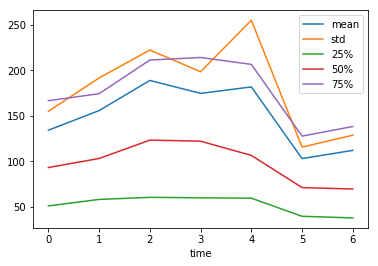

In [16]:
df.groupby(df.index.weekday).describe()['volume'].drop(columns=['count', 'min', 'max']).plot()

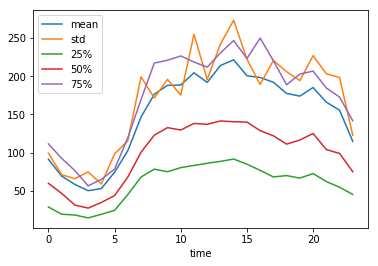

In [17]:
df.groupby(df.index.hour).describe()['volume'].drop(columns=['count', 'min', 'max']).plot()

## First Conclusion

- It seems that friday is a better day to buy than thursday and saturday.
- It seems that buying at night is better than buying during the day (UTC time)


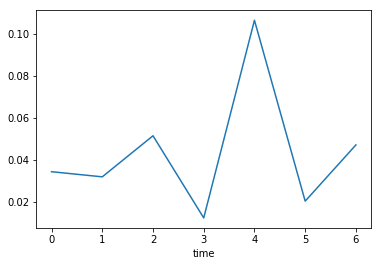

In [18]:
df.groupby(df.index.weekday).mean()['labels'].plot()

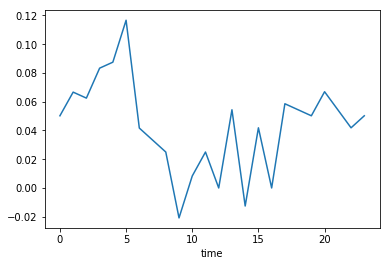

In [19]:
df.groupby(df.index.hour).mean()['labels'].plot()

## To go further

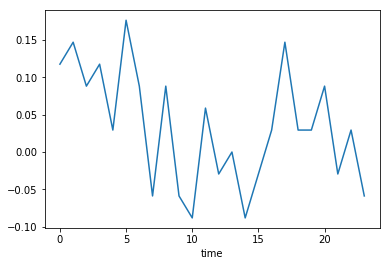

In [20]:
mondays = df[df.index.weekday == 0]
mondays.groupby(mondays.index.hour).mean()['labels'].plot()

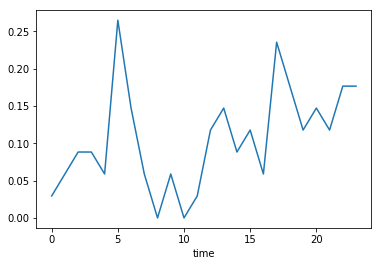

In [21]:
fridays = df[df.index.weekday == 4]
fridays.groupby(fridays.index.hour).mean()['labels'].plot()

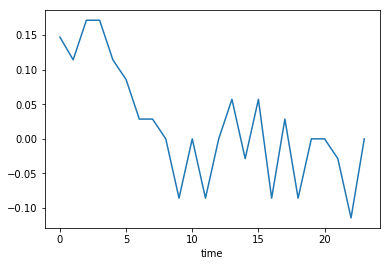

In [22]:
saturdays = df[df.index.weekday == 5]
saturdays.groupby(saturdays.index.hour).mean()['labels'].plot()